In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
all_software = pd.read_csv("trimmed_all.csv") 

In [3]:
list(all_software.columns.values)

['Record_ID',
 'Software_name',
 'File_name',
 'Article_id',
 'Alias',
 'ID',
 'XML_tag1',
 'XML_tag2',
 'Trimmed_XML_tag1_content',
 'Trimmed_XML_tag2_content',
 'Attempted_citation',
 'Actual_citation',
 'Publication_year',
 'Journal_title']

In [4]:
all_software.head(5)

,Record_ID,Software_name,File_name,Article_id,Alias,ID,XML_tag1,XML_tag2,Trimmed_XML_tag1_content,Trimmed_XML_tag2_content,Attempted_citation,Actual_citation,Publication_year,Journal_title
0,1,AstroBlend,apj_818_2_115.xml,apj521773| 10.3847/0004-637X/818/2/115| 521773...,astroblend,0,sc,p,astroblend,We note that our example scripts only explore ...,0,0.0,2016,The Astrophysical Journal
1,2,AstroBlend,apj_818_2_115.xml,apj521773| 10.3847/0004-637X/818/2/115| 521773...,astroblend,0,ext-link,p,http://www.astroblend.com,"<ext-link ext-link-type=""uri"" xlink:href=""http...",1,0.0,2016,The Astrophysical Journal
2,3,AstroPy,aj_148_1_13.xml,aj493368| ANJOAA| 10.1088/0004-6256/148/1/13| ...,10.1051/0004-6361/201322068,1,ext-link,nlm-citation,10.1051/0004-6361/201322068,"<person-group person-group-type=""author""><name...",1,1.0,2014,The Astronomical Journal
3,4,AstroPy,aj_148_1_14.xml,aj495229| ANJOAA| 10.1088/0004-6256/148/1/14| ...,10.1051/0004-6361/201322068,1,ext-link,nlm-citation,10.1051/0004-6361/201322068,"<person-group person-group-type=""author""><coll...",1,1.0,2014,The Astronomical Journal
4,5,AstroPy,aj_148_3_53.xml,aj499538| ANJOAA| 10.1088/0004-6256/148/3/53| ...,10.1051/0004-6361/201322068,1,ext-link,nlm-citation,10.1051/0004-6361/201322068,"<person-group person-group-type=""author""><coll...",1,1.0,2014,The Astronomical Journal


### Remove cols not needed

In [5]:
all_software.drop('Attempted_citation', axis=1, inplace=True)

In [6]:
all_software.drop('Actual_citation', axis=1, inplace=True)

### Convert content 

In [7]:
all_software['Trimmed_XML_tag1_content'] = all_software['Trimmed_XML_tag1_content'].astype('|S')

In [8]:
all_software['Trimmed_XML_tag2_content'] = all_software['Trimmed_XML_tag2_content'].astype('|S')

### Create columns for references, acknowledgements, and footnotes

In [9]:
all_software['ref'] = np.where((all_software['XML_tag2']== "nlm-citation") | (all_software['XML_tag2']== "source") | (all_software['XML_tag2']== "element-citation") | (all_software['Trimmed_XML_tag2_content'].str.contains("bibr")) | (all_software['Trimmed_XML_tag1_content'].str.contains("bibr")), 'yes', 'no')

In [10]:
all_software['ack'] = np.where((all_software['XML_tag2']== "ack"), 'yes', 'no')

In [11]:
all_software['footnote'] = np.where((all_software['XML_tag1']== "fn") | (all_software['XML_tag2']== "fn") | (all_software['ref'] == "no") & (all_software['ack']== "no") & ((all_software['Trimmed_XML_tag2_content'].str.contains("\"fn\"")) | (all_software['Trimmed_XML_tag1_content'].str.contains("\"fn\""))), 'yes', 'no')

### Remove known confounds

In [12]:
# TARDIS
all_software = all_software[~all_software.Trimmed_XML_tag1_content.str.contains("@tardis.byu.edu")]
all_software = all_software[~all_software.Trimmed_XML_tag1_content.str.contains("@tardis.ln.byu.edu")]
all_software = all_software[~all_software.Trimmed_XML_tag1_content.str.contains("@tardis.pha.jhu.edu")]
all_software = all_software[~all_software.Trimmed_XML_tag1_content.str.contains("tardis.ln.byu.edu")]
all_software = all_software[~all_software.Trimmed_XML_tag2_content.str.contains("@tardis.byu.edu")]
all_software = all_software[~all_software.Trimmed_XML_tag2_content.str.contains("@tardis.ln.byu.edu")]
all_software = all_software[~all_software.Trimmed_XML_tag2_content.str.contains("@tardis.pha.jhu.edu")]
all_software = all_software[~all_software.Trimmed_XML_tag2_content.str.contains("tardis.ln.byu.edu")]
all_software = all_software[~all_software.Trimmed_XML_tag1_content.str.contains("detector")]
all_software = all_software[~all_software.Trimmed_XML_tag1_content.str.contains("Detector")]
all_software = all_software[~all_software.Trimmed_XML_tag1_content.str.contains("detector")]
all_software = all_software[~all_software.Trimmed_XML_tag1_content.str.contains("Detector")]
all_software = all_software[~all_software.Trimmed_XML_tag2_content.str.contains("detector")]
all_software = all_software[~all_software.Trimmed_XML_tag2_content.str.contains("Detector")]
all_software = all_software[~all_software.Trimmed_XML_tag1_content.str.contains("detection")]
all_software = all_software[~all_software.Trimmed_XML_tag1_content.str.contains("Detection")]
all_software = all_software[~all_software.Trimmed_XML_tag2_content.str.contains("detection")]
all_software = all_software[~all_software.Trimmed_XML_tag2_content.str.contains("Detection")]
all_software = all_software[~all_software.Trimmed_XML_tag1_content.str.contains("STARDISK")]
all_software = all_software[~all_software.Trimmed_XML_tag2_content.str.contains("STARDISK")]

In [13]:
# Stingray
all_software = all_software[~all_software.Trimmed_XML_tag1_content.str.contains("Stingray Nebula")]
all_software = all_software[~all_software.Trimmed_XML_tag1_content.str.contains("Stingray nebula")]
all_software = all_software[~all_software.Trimmed_XML_tag1_content.str.contains("stingray nebula")]
all_software = all_software[~all_software.Trimmed_XML_tag1_content.str.contains("The Stingray")]
all_software = all_software[~all_software.Trimmed_XML_tag1_content.str.contains("The stingray")]
all_software = all_software[~all_software.Trimmed_XML_tag1_content.str.contains("the stingray")]
all_software = all_software[~all_software.Trimmed_XML_tag1_content.str.contains("the stingray")]
all_software = all_software[~all_software.Trimmed_XML_tag1_content.str.contains("the stingray")]
all_software = all_software[~all_software.Trimmed_XML_tag1_content.str.contains("Stingray Light Curve")]
all_software = all_software[~all_software.Trimmed_XML_tag1_content.str.contains("Stingray light curve")]
all_software = all_software[~all_software.Trimmed_XML_tag1_content.str.contains("stingray light curve")]
all_software = all_software[~all_software.Trimmed_XML_tag1_content.str.contains("tardis.ln.byu.edu")]
all_software = all_software[~all_software.Trimmed_XML_tag2_content.str.contains("Stingray Nebula")]
all_software = all_software[~all_software.Trimmed_XML_tag2_content.str.contains("Stingray nebula")]
all_software = all_software[~all_software.Trimmed_XML_tag2_content.str.contains("stingray nebula")]
all_software = all_software[~all_software.Trimmed_XML_tag2_content.str.contains("The Stingray")]
all_software = all_software[~all_software.Trimmed_XML_tag2_content.str.contains("The stingray")]
all_software = all_software[~all_software.Trimmed_XML_tag2_content.str.contains("the stingray")]
all_software = all_software[~all_software.Trimmed_XML_tag2_content.str.contains("the stingray")]
all_software = all_software[~all_software.Trimmed_XML_tag2_content.str.contains("the stingray")]
all_software = all_software[~all_software.Trimmed_XML_tag2_content.str.contains("Stingray Light Curve")]
all_software = all_software[~all_software.Trimmed_XML_tag2_content.str.contains("Stingray light curve")]
all_software = all_software[~all_software.Trimmed_XML_tag2_content.str.contains("stingray light curve")]
all_software = all_software[~all_software.Trimmed_XML_tag2_content.str.contains("tardis.ln.byu.edu")]

In [14]:
# spec2d
all_software = all_software[~all_software.Alias.str.contains("idlspec2d")]
all_software = all_software[~all_software.Trimmed_XML_tag1_content.str.contains("idlspec2d")]
all_software = all_software[~all_software.Trimmed_XML_tag2_content.str.contains("idlspec2d")]

### Results to a csv

In [15]:
all_software.to_csv("clean_all_software.csv")

### Some simple analysis

In [16]:
# how many articles were found for each package?
all_software.groupby('Software_name')['File_name'].count()

Software_name
AstroBlend       2
AstroPy       1168
RADMC-3D       613
Spec2d         610
Stingray         9
TARDIS          19
WCS Tools      191
Name: File_name, dtype: int64

In [17]:
# How many articles containing software aliases had references?
all_refs = all_software.loc[all_software['ref'] == 'yes']
all_refs.groupby('Software_name')['File_name'].count()

Software_name
AstroPy      1014
RADMC-3D      416
Spec2d        436
Stingray        5
TARDIS         16
WCS Tools     105
Name: File_name, dtype: int64

In [18]:
# Proportion of articles containing software aliases that had references?
ref_proportion = all_refs.groupby('Software_name')['File_name'].count()/all_software.groupby('Software_name')['File_name'].count()
ref_proportion

Software_name
AstroBlend         NaN
AstroPy       0.868151
RADMC-3D      0.678630
Spec2d        0.714754
Stingray      0.555556
TARDIS        0.842105
WCS Tools     0.549738
Name: File_name, dtype: float64

In [19]:
# How many articles containing software aliases had acknowledgements?
all_ack = all_software.loc[all_software['ack'] == 'yes']
all_ack.groupby('Software_name')['File_name'].count()

Software_name
AstroPy      55
RADMC-3D     14
Spec2d       35
Stingray      1
WCS Tools     1
Name: File_name, dtype: int64

In [20]:
# Footnotes are difficult...
# How many articles containing software aliases had only footnotes?
all_fn = all_software.loc[all_software['footnote'] == 'yes']
all_fn.groupby('Software_name')['File_name'].count()

Software_name
AstroPy      11
RADMC-3D     33
Spec2d       20
Stingray      2
WCS Tools    17
Name: File_name, dtype: int64

In [21]:
# Did any articles have no reference, acknowledgement, or footnote?
no_credit = all_software.loc[(all_software['footnote'] == 'no') & (all_software['ref'] == 'no') & (all_software['ack'] == 'no')]

In [22]:
no_credit = no_credit.loc[~(no_credit['File_name'].isin(all_fn['File_name']))]

In [23]:
no_credit = no_credit.loc[~(no_credit['File_name'].isin(all_refs['File_name']))]

In [24]:
no_credit = no_credit.loc[~(no_credit['File_name'].isin(all_ack['File_name']))]

In [25]:
no_credit.groupby('Software_name')['File_name'].count()

Software_name
AstroPy      25
RADMC-3D     27
Spec2d       35
TARDIS        2
WCS Tools    36
Name: File_name, dtype: int64

In [26]:
no_credit_proportion = ref_proportion = no_credit.groupby('Software_name')['File_name'].count()/all_software.groupby('Software_name')['File_name'].count()
no_credit_proportion

Software_name
AstroBlend         NaN
AstroPy       0.021404
RADMC-3D      0.044046
Spec2d        0.057377
Stingray           NaN
TARDIS        0.105263
WCS Tools     0.188482
Name: File_name, dtype: float64

### Look at totals over time

In [71]:
over_time = pd.DataFrame({'Count' : all_software.groupby( [ "Software_name", "Publication_year"] ).size()}).reset_index()

In [72]:
over_time.head()

,Software_name,Publication_year,Count
0,AstroBlend,2016,2
1,AstroPy,2013,7
2,AstroPy,2014,80
3,AstroPy,2015,125
4,AstroPy,2016,250


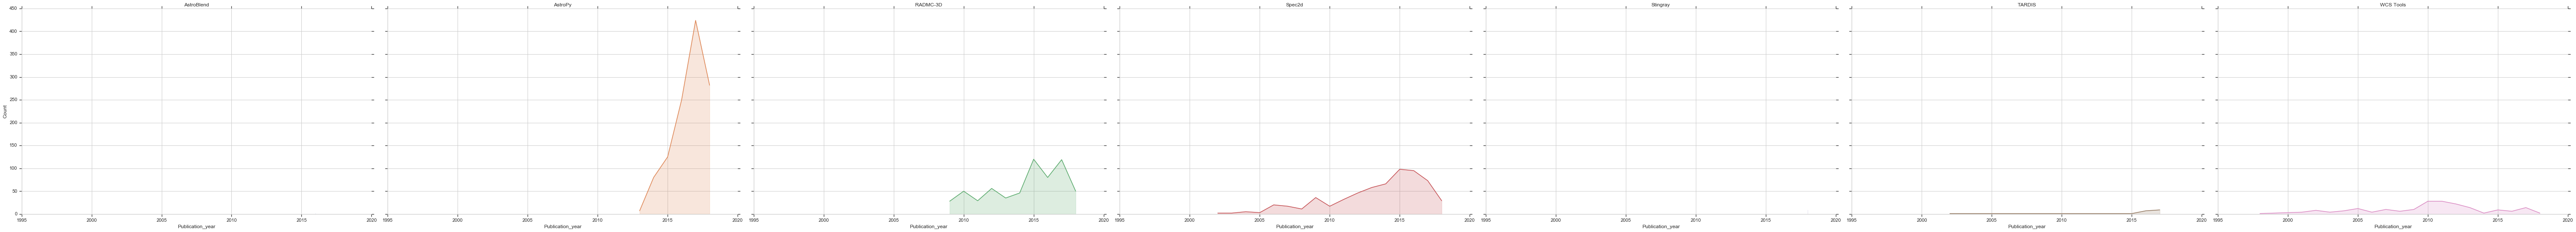

In [107]:
%matplotlib inline
sns.set(style="whitegrid")
g = sns.FacetGrid(over_time, col='Software_name', hue='Software_name', height = 8, aspect = 1.5)
g = g.map(plt.plot, 'Publication_year', 'Count')
g = g.map(plt.fill_between, 'Publication_year', 'Count', alpha=0.2).set_titles("{col_name} Software_name")
g = g.set_titles("{col_name}")
plt.subplots_adjust(top=0.92)
g.savefig("Plots.png")